# MODEL_1: Manual network

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Dl framwork - tensorflow, keras a backend 
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization 
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from IPython.display import display
from os import listdir
from os.path import isfile, join
from PIL import Image
import glob
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
dir_name_train_Benign = 'data/train/Benign'
dir_name_train_Early = 'data/train/Early'
dir_name_train_Pre = 'data/train/Pre'
dir_name_train_Pro = 'data/train/Pros'



In [16]:
def plot_images(item_dir, n=5):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(35, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(2, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()

In [17]:
def Images_details_Print_data(data, path):
    print(" ====== Images in: ", path)    
    for k, v in data.items():
        print("%s:\t%s" % (k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100  # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100  # No image will be bigger than that
    data['max_height'] = 0


    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['max_width'] = max(width, data['max_height'])
        data['min_height'] = min(height, data['min_height'])
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)


Trainned data for Benign :

 ====== Images in:  data/train/Benign
images_count:	504
min_width:	224
max_width:	224
min_height:	224
max_height:	224



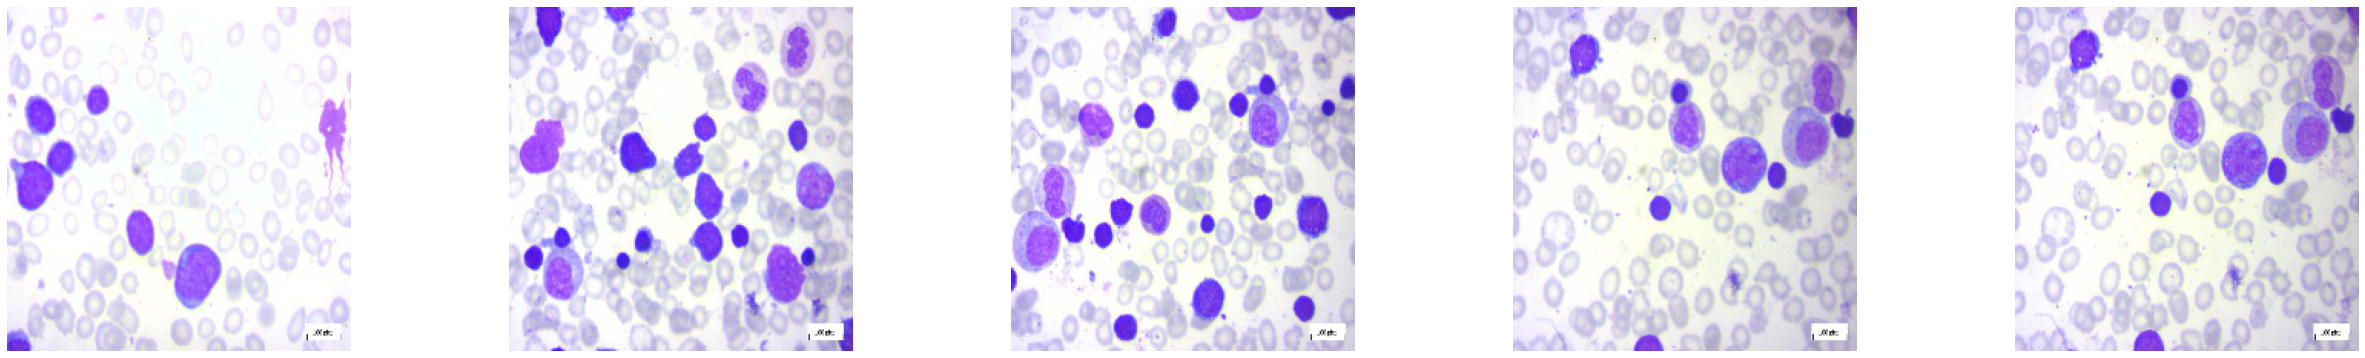

In [18]:
print("")
print("Trainned data for Benign :")
print("")

Images_details(dir_name_train_Benign)
print("")
plot_images(dir_name_train_Benign)


Trainned data for Early:

 ====== Images in:  data/train/Early
images_count:	985
min_width:	224
max_width:	224
min_height:	224
max_height:	224



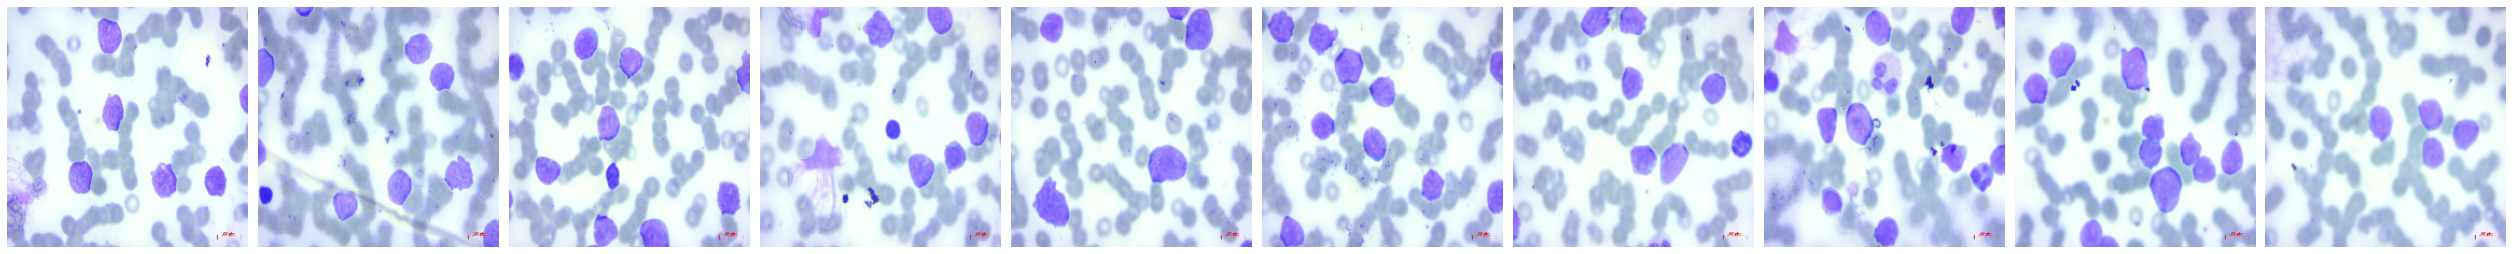

In [19]:
print("")
print("Trainned data for Early:")
print("")

Images_details(dir_name_train_Early)
print("")
plot_images(dir_name_train_Early, 10)


Trainned data for Pre:

 ====== Images in:  data/train/Pre
images_count:	963
min_width:	224
max_width:	224
min_height:	224
max_height:	224



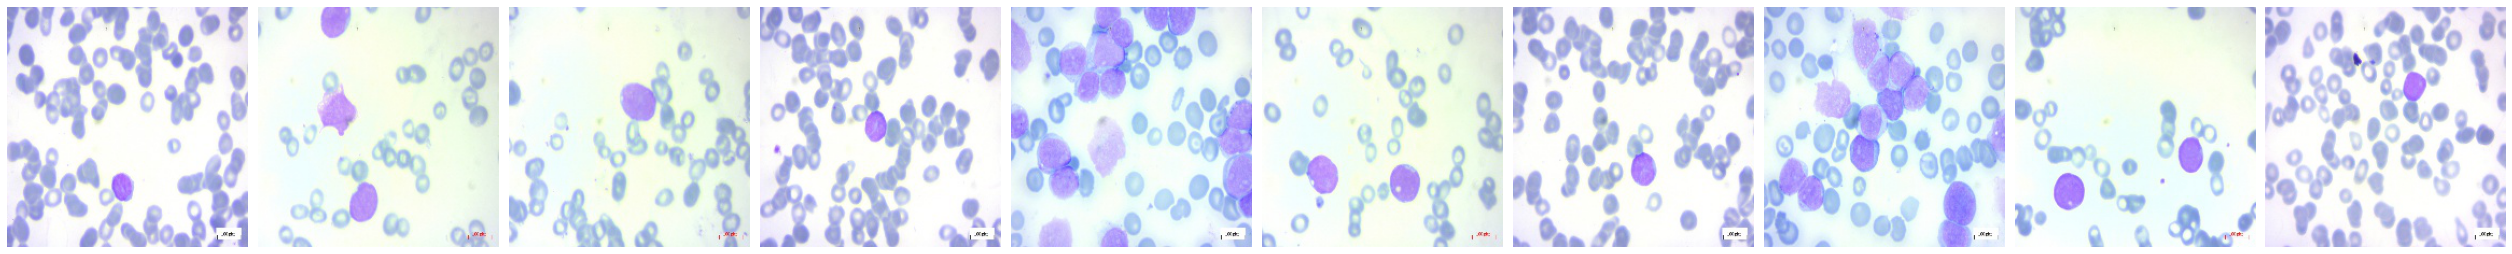

In [20]:
print("")
print("Trainned data for Pre:")
print("")

Images_details(dir_name_train_Pre)
print("")
plot_images(dir_name_train_Pre, 10)


Trainned data for Pro:

 ====== Images in:  data/train/Pros
images_count:	804
min_width:	224
max_width:	224
min_height:	224
max_height:	224



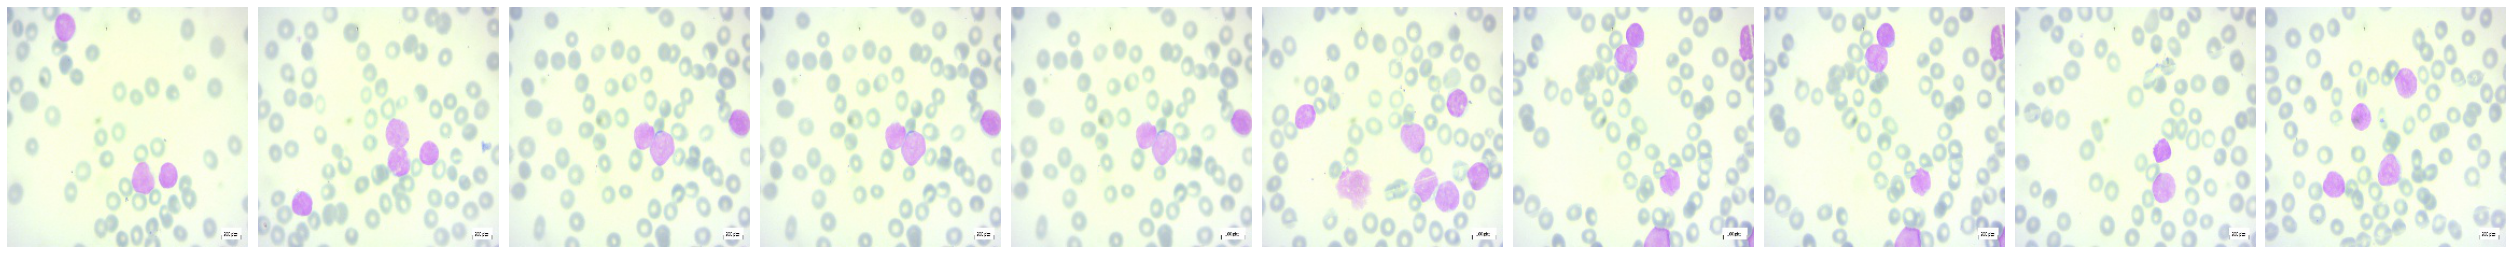

In [21]:
print("")
print("Trainned data for Pro:")
print("")

Images_details(dir_name_train_Pro)
print("")
plot_images(dir_name_train_Pro, 10)

In [22]:
Classifier = Sequential()
Classifier.add(Convolution2D(32, (3,3), input_shape = (100,100,3),activation = "relu"))
Classifier.add(MaxPool2D(pool_size = (2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(38, activation ='relu'))

In [23]:
Classifier.add(Dense(4, activation='softmax'))
Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [25]:
training_set=train_datagen.flow_from_directory('data/train',target_size=(100,100),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('data/test',target_size=(100,100),batch_size=32,class_mode='categorical')

Found 3256 images belonging to 4 classes.
Found 1052 images belonging to 4 classes.


In [26]:
img_dims = 150
epochs = 50
batch_size = 32

In [27]:
#### Fitting the model
history = Classifier.fit_generator(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/2
101/101 [==============================] - 29s 280ms/step - loss: 2.3705 - accuracy: 0.5400 - val_loss: 0.5315 - val_accuracy: 0.8438
Epoch 2/2
101/101 [==============================] - 25s 249ms/step - loss: 0.7730 - accuracy: 0.6836 - val_loss: 0.6577 - val_accuracy: 0.6367


In [28]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

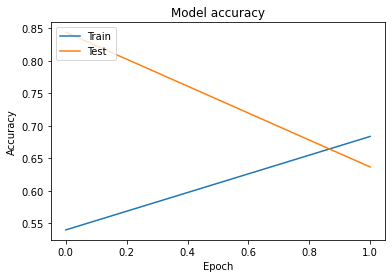

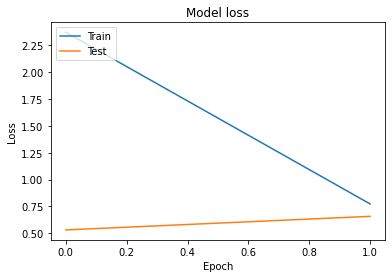

In [29]:
graph()